In [13]:
import numpyro
numpyro.enable_x64()

import matplotlib
import matplotlib.pyplot as plt

import jax
import jax.numpy as np
from jax.random import PRNGKey

import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS, Predictive

import pandas as pd

import mechbayes
import mechbayes.util as util
import mechbayes.models.SEIRD
import mechbayes.models.SEIRD_renewal

# Run Inference

In [14]:
data = util.load_data()

start = '2020-03-04'
end = None
model_type = mechbayes.models.SEIRD_renewal.SEIRD
places = ['MO']

for place in places:
    util.run_place(data,
                   place,
                   start=start,
                   end=end,
                   model_type=model_type,
                   rw_scale=1e-1,
                   resample_high=80,
                   resample_low=0,
                   num_warmup=100,
                   num_samples=100)

KeyboardInterrupt: 

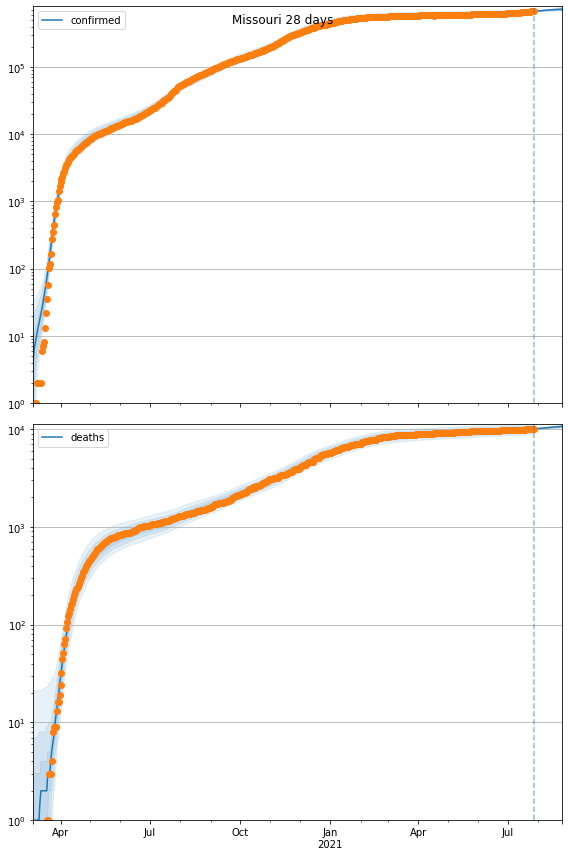

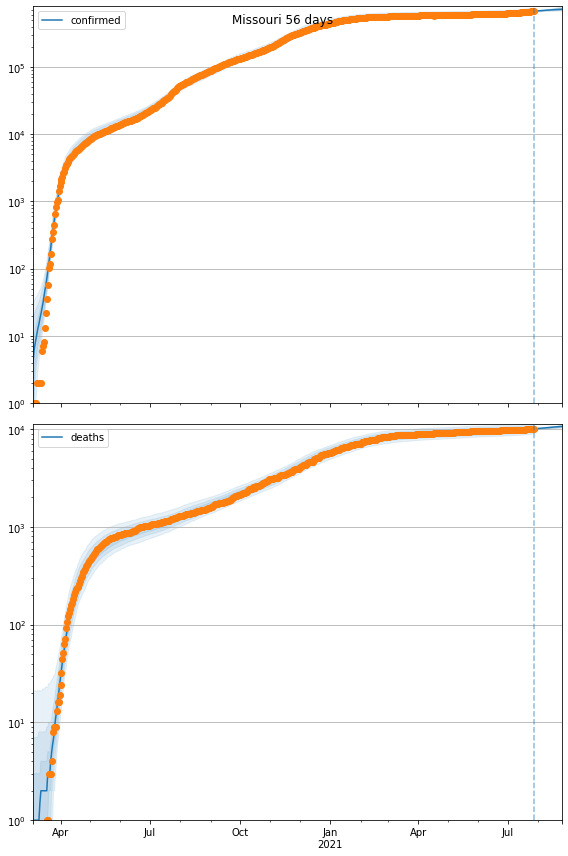

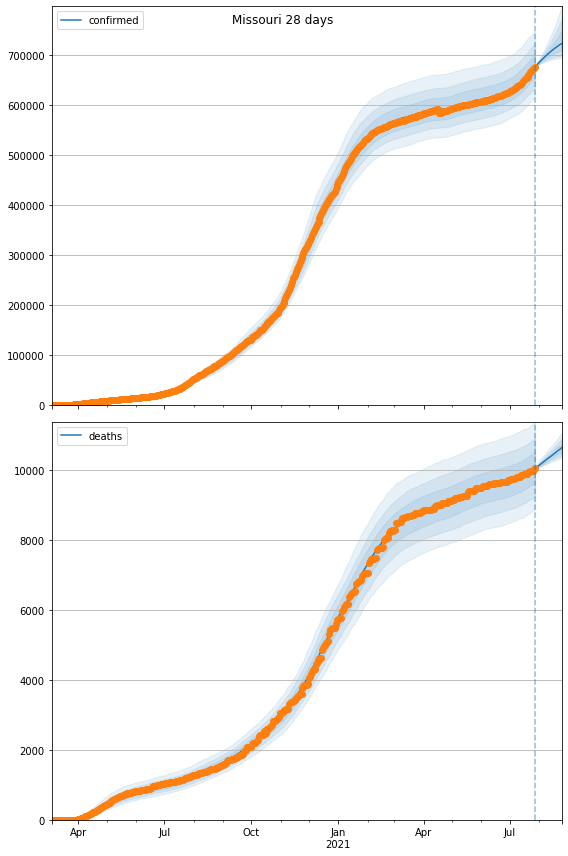

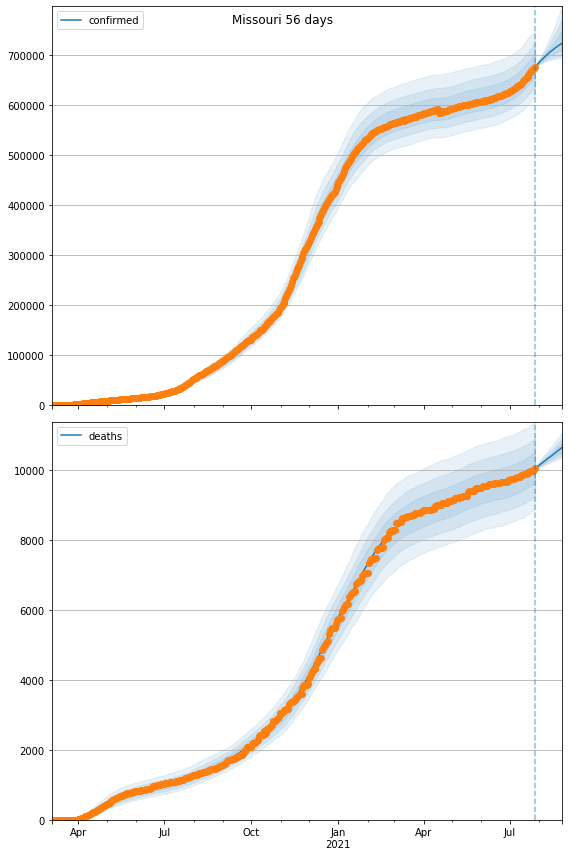

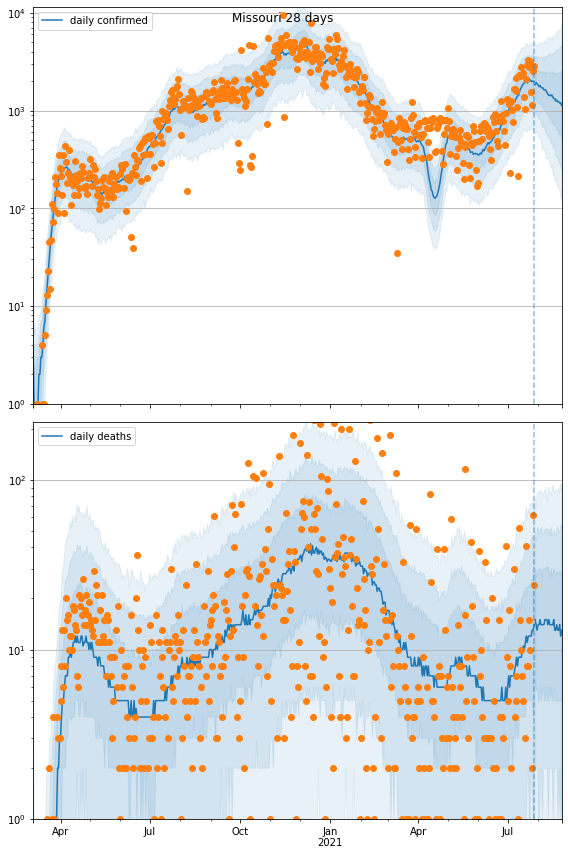

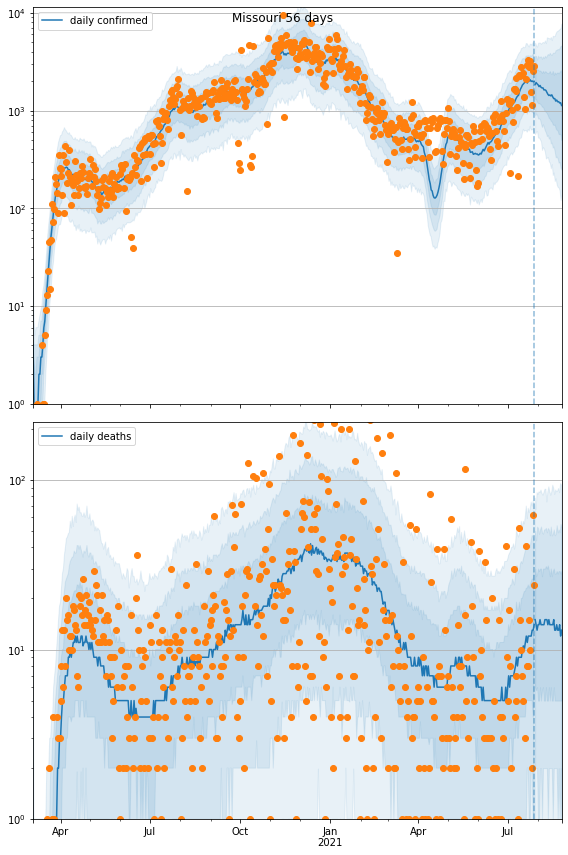

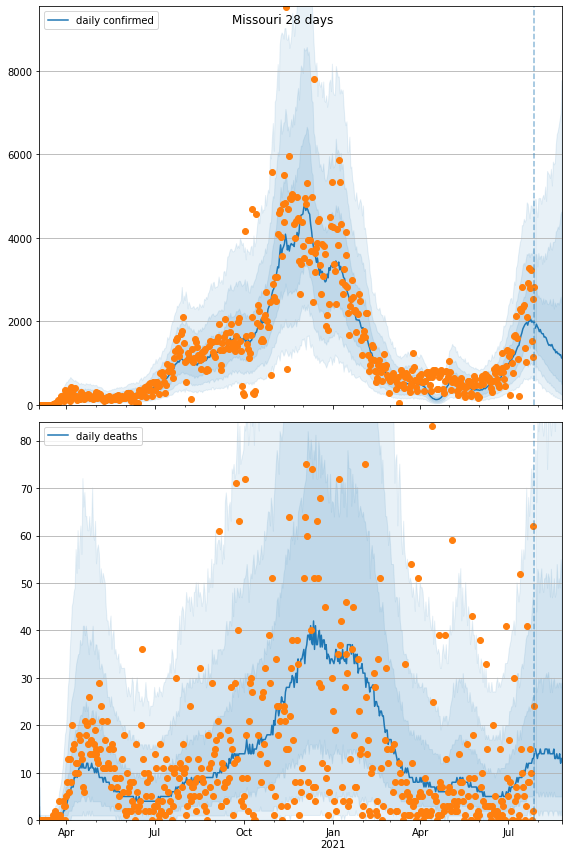

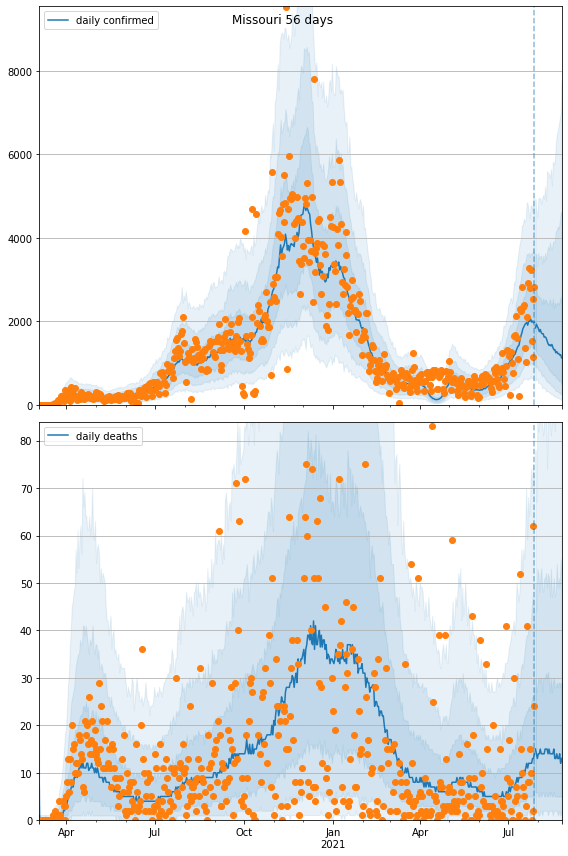

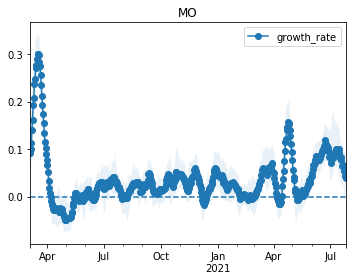

In [12]:
save = True

# Inspect and Save Results 
for place in places:
    util.gen_forecasts(data, 
                       place,
                       model_type=model_type,
                       start=start,
                       end=end,
                       save=save)